In [1]:
import numpy as np 
import pandas as pd

/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
trd = pd.read_csv('/Users/riyaazkhan/Documents/Imperial_Maths/Algorithmic_Trading_Club/Competitions/CIMBTR-Equity_in_post-HCR_Survival_Predictions/Competition_Data/train.csv',index_col='ID')

In [3]:
trdog = trd.copy()
trd

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
ID,,,,,,,,,,,,,,,,,,,,,
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,Intermediate - TED AML case <missing cytogenetics,NaN,Favorable,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Bi-directional non-permissive,NaN,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,18.633
28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,Peripheral blood,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,TBD cytogenetics,NaN,Poor,NaN,2.0,8.0,No TBI,NaN,6.0,Peripheral blood,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,NaN,2.0,No,10.0,0.0,23.157


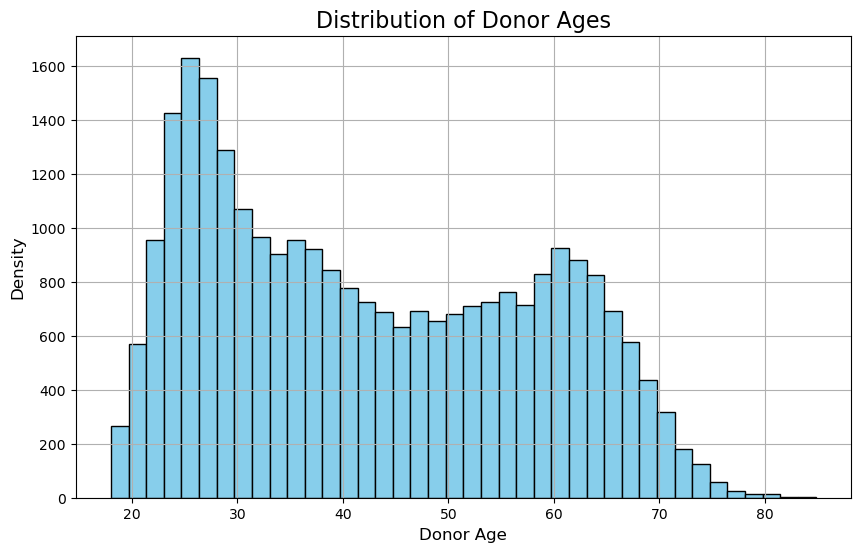

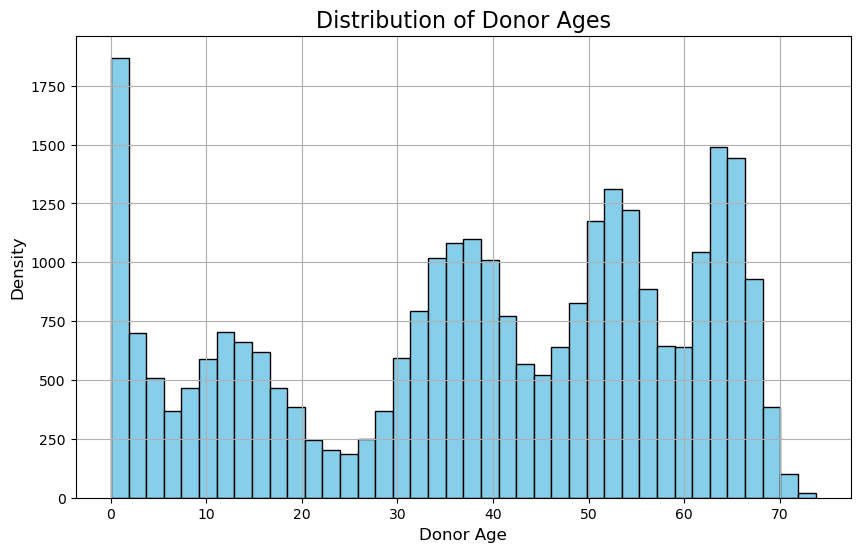

In [4]:
#For changing the data from categorical to numerical. trdog is the original data without it being altered.

#dri_score
(trdog['dri_score'].value_counts()) # Different Values are: Low, Intermediate, High,Very High
trd['dri_score'] = trdog['dri_score'].map({'Low':1,
                                             'Intermediate':2,
                                             'Intermediate - TED AML case <missing cytogenetics':2,
                                             'High':3,
                                             'High - TED AML case <missing cytogenetics':3,
                                             'Very high':4,}).fillna(np.nan)

#psych_disturb
(trdog['psych_disturb'].value_counts()) # Different Values are: No,Yes,Not Done,NaN
trd['psych_disturb'] = trdog['psych_disturb'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#cyto_scores
(trdog['cyto_score'].value_counts())
trd['cyto_score'] = trdog['cyto_score'].map({'Poor':1,'Intermediate':2,'Normal':3,'Favourable':4}).fillna(np.nan)

#Diabetes
(trdog['diabetes'].value_counts()) # Different Values are: No,Yes,Not Done,NaN
trd['diabetes'] = trdog['diabetes'].map({'No': 0, 'Yes':1,}).fillna(np.nan)

#hla_match_c_high
(trdog['hla_match_c_high'].value_counts())
trd['hla_match_c_high'] = trdog['hla_match_c_high'].fillna(np.nan)

#hla_high_res_8
(trdog['hla_high_res_8'].value_counts())
trd['hla_high_res_8'] = trdog['hla_high_res_8'].fillna(np.nan)

#tbi_status
(trdog['tbi_status'].value_counts())
import pandas as pd

trd['TBI_administered'] = trdog['tbi_status'].apply(lambda x: 0 if x == 'No TBI' else 1)

# 2. Dose Level
def get_dose_level(x):
    if x == 'No TBI':
        return 0
    elif '<=cGy' in x:
        return 1
    elif '>cGy' in x:
        return 2
    else:
        return np.nan  # Unknown dose

trd['TBI_dose'] = trd['tbi_status'].apply(get_dose_level)

# 3. Fractionation
def get_fractionation(x):
    if x == 'No TBI':
        return 0
    elif 'single' in x:
        return 1
    elif 'fractionated' in x:
        return 2
    else:
        return np.nan  # Unknown fractionation

trd['TBI_fractionation'] = trd['tbi_status'].apply(get_fractionation)

# Drop the original column (optional)
trd = trd.drop(columns=['tbi_status'])

#arrhythmia
(trdog['arrhythmia'].value_counts()) # Different Values are: No,Yes,Not Done,NaN
trd['arrhythmia'] = trdog['arrhythmia'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#hla_low_res_6
(trdog['hla_low_res_6'].value_counts()) #Think about normalzing this data set, as it takes the values,2,4,6,8.
trd['hla_low_res_6'] = trdog['hla_low_res_6'].fillna(np.nan)

#graft_type
(trdog['graft_type'].value_counts())
trd['graft_type'] = trdog['graft_type'].map({'Peripheral blood': 1, 'Bone marrow': 2}).fillna(np.nan)

#vent_hist
(trdog['vent_hist'].value_counts())
trd['vent_hist'] = trdog['vent_hist'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#renal_issue
(trdog['renal_issue'].value_counts())
trd['renal_issue'] = trdog['renal_issue'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#pulm_severe
(trdog['pulm_severe'].value_counts())
trd['pulm_severe'] = trdog['pulm_severe'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#prim_disease_hct
(trdog['prim_disease_hct'].value_counts())
def group_diseases(disease):
    if disease in ['ALL', 'AML', 'Other acute leukemia', 'CML']:
        return 1
    elif disease in ['NHL', 'HD']:
        return 2
    elif disease == 'MDS':
        return 3
    elif disease in ['Solid tumor', 'Other leukemia']:
        return 4
    elif disease in ['SAA', 'IMD']:
        return 5
    else:
        return np.nan

trd['prim_disease_hct'] = trdog['prim_disease_hct'].apply(group_diseases)

#hla_high_res_6
(trdog['hla_high_res_6'].value_counts())
trd['hla_high_res_6'] = trdog['hla_high_res_6'].fillna(np.nan)

#cmv_status
(trdog['cmv_status'].value_counts())
trdog['cmv_status'] = trdog['cmv_status'].fillna('Unknown').astype(str)
trd['CMV Patient'] = trdog['cmv_status'].apply(lambda x: 0 if x.endswith('-') else 1 if x.endswith('+') else np.nan)
trd['CMV Donor'] = trdog['cmv_status'].apply(lambda x: 0 if x.startswith('-') else 1 if x.startswith('+') else np.nan)
trd.drop(columns=['cmv_status'], inplace=True)

#hla_high_res_10
(trdog['hla_high_res_10'].value_counts())
trd['hla_high_res_6'] = trdog['hla_high_res_6'].fillna(np.nan)

#hla_match_dqb1_high
(trdog['hla_match_dqb1_high'].value_counts())
trd['hla_match_dqb1_high'] = trdog['hla_match_dqb1_high'].fillna(np.nan)

(trdog['tce_imm_match'].value_counts())
custom_mapping = {
    'G/G': 4,  # Best match
    'G/H': 3,
    'H/H': 3,
    'G/P': 2,
    'H/P': 2,
    'P/H': 1,
    'P/P': 0   # Worst match
}
trd['tce_imm_match'] = trdog['tce_imm_match'].apply(lambda x: custom_mapping.get(x, np.nan))

#hla_nmdp_6
(trdog['hla_nmdp_6'].value_counts())
trd['hla_nmdp_6'] = trdog['hla_nmdp_6'].fillna(np.nan)

#hla_match_c_low
(trdog['hla_match_c_low'].value_counts())
trd['hla_match_c_low'] = trdog['hla_match_c_low'].fillna(np.nan)

#rituximab
(trdog['rituximab'].value_counts())
trd['rituximab'] = trdog['rituximab'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#hla_match_drb1_low
(trdog['hla_match_drb1_low'].value_counts())
trd['hla_match_drb1_low'] = trdog['hla_match_drb1_low'].fillna(np.nan)

#hla_match_dqb1_low
(trdog['hla_match_dqb1_low'].value_counts())
trd['hla_match_dqb1_low'] = trdog['hla_match_dqb1_low'].fillna(np.nan)

#prod_type
(trdog['prod_type'].value_counts())
trd['prod_type'] = trdog['prod_type'].map({'PB': 0, 'BM': 1}).fillna(np.nan)

#cyto_score_detail
(trdog['cyto_score_detail'].value_counts())
trd['cyto_score_detail'] = trdog['cyto_score_detail'].map({'Poor':1,
                                             'Intermediate':2,
                                             'Favorable':3,}).fillna(np.nan)

#conditioning_intensity
(trdog['conditioning_intensity'].value_counts())
trd['conditioning_intensity'] = trdog['conditioning_intensity'].map({'No drugs reported': 0, 
                                                                'NMA': 1,'RIC':2,'MAC':3}).fillna(np.nan)

#ethnicity
(trdog['ethnicity'].value_counts())
trd['ethnicity'] = trdog['ethnicity'].map({'Non-resident of the U.S.':1,
                                             'Hispanic or Latino':2,
                                             'Not Hispanic or Latino':3,}).fillna(np.nan)

#year_hct
(trdog['year_hct'].value_counts())
trd['year_hct'] = trdog['year_hct'].fillna(np.nan)

#obesity
(trdog['obesity'].value_counts())
trd['obesity'] = trdog['obesity'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#mrd_hct
(trdog['mrd_hct'].value_counts())
trd['mrd_hct'] = trdog['mrd_hct'].map({'Negative': 0, 'Positive': 1}).fillna(np.nan)

#in_vivo_tcd
(trdog['in_vivo_tcd'].value_counts())
trd['in_vivo_tcd'] = trdog['in_vivo_tcd'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#tce_match
(trdog['tce_match'].value_counts())
trd['tce_match'] = trdog['tce_match'].map({'HvG non-permissive':1,
                                        'GvH non-permissive':2,
                                        'Permissive':3,
                                        'Fully matched':4}).fillna(np.nan)

#hla_match_a_high
(trdog['hla_match_a_high'].value_counts())
trd['hla_match_a_high'] = trdog['hla_match_a_high'].fillna(np.nan)

#hepatic_severe
(trdog['hepatic_severe'].value_counts())
trd['hepatic_severe'] = trdog['hepatic_severe'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#donor_age
(trdog['donor_age'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns
# Create the plot
age_data = (trdog['donor_age'])
plt.figure(figsize=(10, 6))

# Plot histogram and KDE together
plt.hist(age_data, bins=40, color='skyblue', edgecolor='black')  # Plot the histogram with 10 bins


# Customize the plot
plt.title('Distribution of Donor Ages', fontsize=16)
plt.xlabel('Donor Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)

# Show the plot
#plt.show()

# From this graph i can either take the log of the age or group the ages.
#Outliers may also affect the results, consider removing them.

#First I am going to try Log Transformation
import math
trd['donor_age'] = np.log(trdog['donor_age']).fillna(np.nan)

#prior_tumor
(trdog['prior_tumor'].value_counts())
trd['prior_tumor'] = trdog['prior_tumor'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#hla_match_b_low
(trdog['hla_match_b_low'].value_counts())
trd['hla_match_b_low'] = trdog['hla_match_b_low'].fillna(np.nan)

#peptic_ulcer
(trdog['peptic_ulcer'].value_counts())
trd['peptic_ulcer'] = trdog['peptic_ulcer'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#age_at_hct
((trdog['age_at_hct'].value_counts()))
age_data = (trdog['age_at_hct'])
plt.figure(figsize=(10, 6))

# Plot histogram and KDE together
plt.hist(age_data, bins=40, color='skyblue', edgecolor='black')  # Plot the histogram with 10 bins


# Customize the plot
plt.title('Distribution of Donor Ages', fontsize=16)
plt.xlabel('Donor Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)

# Show the plot
#plt.show()

#Once again i can group ages or log. I will take the log in this case.
trd['age_at_hct'] = np.log(trdog['age_at_hct']).fillna(np.nan)

#hla_match_a_low
((trdog['hla_match_a_low'].value_counts()))
trd['hla_match_a_low'] = trdog['hla_match_a_low'].fillna(np.nan)

#gvhd_proph

x = ((trdog['gvhd_proph'].unique()))
# Assuming 'prophylaxis_regimen' is the column with the GVHD prophylaxis data

# Create a DataFrame with one-hot encoding
df_one_hot = pd.get_dummies(trdog['gvhd_proph'], prefix='GVHD', dtype=int)

# Concatenate the one-hot encoded columns back into the original dataframe
trd = pd.concat([trd, df_one_hot], axis=1)
trd.drop(columns=['gvhd_proph'], inplace=True)

#rheum_issue
((trdog['rheum_issue'].value_counts()))
trd['rheum_issue'] = trdog['rheum_issue'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#sex_match
((trdog['sex_match'].value_counts()))
#trd['rheum_issue'] = trdog['rheum_issue'].map({'No': 0, 'Yes': 1}).fillna(np.nan)
def donorsexfinder(sexcombo):
    if sexcombo == 'M-M':
        return 1
    elif sexcombo == 'M-F':
        return 1
    elif sexcombo == 'F-M':
        return 0
    elif sexcombo == "F-F":
        return 0 
    else:
        return np.nan
def patientsexfinder(sexcombo):
    if sexcombo == 'M-M':
        return 1
    elif sexcombo == 'M-F':
        return 0
    elif sexcombo == 'F-M':
        return 1
    elif sexcombo == "F-F":
        return 0 
    else:
        return np.nan
def samesex(sexcombo):
    if sexcombo == 'M-M':
        return 1
    elif sexcombo == 'M-F':
        return 0
    elif sexcombo == 'F-M':
        return 0
    elif sexcombo == "F-F":
        return 1
    else:
        return np.nan
    
trd['Donor Sex'] = trdog['sex_match'].apply(donorsexfinder)
trd['Patient Sex'] = trdog['sex_match'].apply(patientsexfinder)
trd['Same Sex'] = trdog['sex_match'].apply(samesex)
trd.drop(columns=['sex_match'], inplace=True)

#race_group
((trdog['race_group'].value_counts()))

#karnofsky_score
((trdog['karnofsky_score'].value_counts()))
trd['karnofsky_score'] = trdog['karnofsky_score'].fillna(np.nan)

#hepatic_mild
((trdog['hepatic_mild'].value_counts()))
trd['hepatic_mild'] = trdog['hepatic_mild'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#tce_div_match
((trdog['tce_div_match'].value_counts()))
trd['tce_div_match'] = trdog['tce_div_match'].map({'Permissive mismatched':0,
                                        'GvH non-permissive':1,
                                        'HvG non-permissive':2,
                                        'Bi-directional non-permissive':3}).fillna(np.nan)

#donor_related
((trdog['donor_related'].value_counts()))
# Create a DataFrame with one-hot encoding

df_one_hot_relation = pd.get_dummies(trdog['donor_related'], prefix='Relation', dtype=int)

# Concatenate the one-hot encoded columns back into the original dataframe
trd = pd.concat([trd, df_one_hot_relation], axis=1)
trd.drop(columns=['donor_related'], inplace=True)

#hla_low_res_8
((trdog['hla_low_res_8'].value_counts()))
trd['hla_low_res_8'] = trdog['hla_low_res_8'].fillna(np.nan)

#cardiac
((trdog['cardiac'].value_counts()))
trd['cardiac'] = trdog['cardiac'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#hla_match_drb1_high
((trdog['hla_match_drb1_high'].value_counts()))
trd['hla_match_drb1_high'] = trdog['hla_match_drb1_high'].fillna(np.nan)

#pulm_moderate
((trdog['pulm_moderate'].value_counts()))
trd['pulm_moderate'] = trdog['pulm_moderate'].map({'No': 0, 'Yes': 1}).fillna(np.nan)

#hla_low_res_10
((trdog['hla_low_res_10'].value_counts()))
trd['hla_low_res_10'] = trdog['hla_low_res_10'].fillna(np.nan)

#melphalan_dose
((trdog['melphalan_dose'].value_counts()))
trd['melphalan_dose'] = trdog['melphalan_dose'].map({'N/A, Mel not given': 0, 'MEL': 1}).fillna(np.nan)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
#race_group
y_time = trd['efs_time']
y_event = trd['efs']
y_race = trd['race_group']
X = trd.drop(columns=['efs', 'efs_time', 'race_group'])

In [6]:
import pandas as pd
from sksurv.util import Surv
from sksurv.ensemble import RandomSurvivalForest
from sklearn.ensemble import HistGradientBoostingRegressor

y = Surv.from_dataframe('efs', 'efs_time', trd)  # Target: structured array for survival analysis

from sklearn.impute import KNNImputer
# KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [18]:
len(X_imputed)

28800

In [39]:
X_train, X_test, y_time_train, y_time_test, y_event_train, y_event_test, race_train, race_test = train_test_split(
    X_imputed, y_time, y_event, y_race, test_size=0.01, random_state=42, stratify=y_race
)

In [8]:
y_train = Surv.from_dataframe('event', 'time', pd.DataFrame({'event': y_event_train, 'time': y_time_train}))

model = RandomSurvivalForest( 
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42,
    verbose=1
)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished


RandomSurvivalForest(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                     n_jobs=-1, random_state=42, verbose=1)

In [41]:
risk_score = model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:  6.8min finished


In [40]:
print(len(X_test))

288


In [42]:
from sksurv.metrics import concordance_index_censored
from lifelines.utils import concordance_index

# Calculate C-index for each racial group
c_indices = []
for group in race_test.unique():
    mask = (race_test == group)  # Filter data for the current racial group
    c_index = concordance_index(
        y_time_test[mask],  # Survival time for the group
        -risk_score[mask],  # Risk scores (negative for correct ranking)
        y_event_test[mask]  # Event indicator
    )
    c_indices.append(c_index)

# Calculate mean and standard deviation of C-indices
mean_c_index = np.mean(c_indices)
std_c_index = np.std(c_indices)

# Stratified C-index score
stratified_c_index = mean_c_index - std_c_index
print(f"Stratified C-index: {stratified_c_index:.4f}")

Stratified C-index: 0.6248


ID
3073     52.125
14044    31.589
13833    77.929
6150      8.053
20535     1.525
          ...  
9785     13.321
10602     3.895
24544    22.752
8830     17.264
13784     3.795
Name: efs_time, Length: 188, dtype: float64


IndexError: boolean index did not match indexed array along dimension 0; dimension is 999 but corresponding boolean dimension is 5760